# TD5 - Adèle Marcon

1. Prenez une image de votre choix (pas trop grande) en la chargeant avec PIL. Lister les couleurs présentes, identifier celles qui sont uniques et leur fréquence.


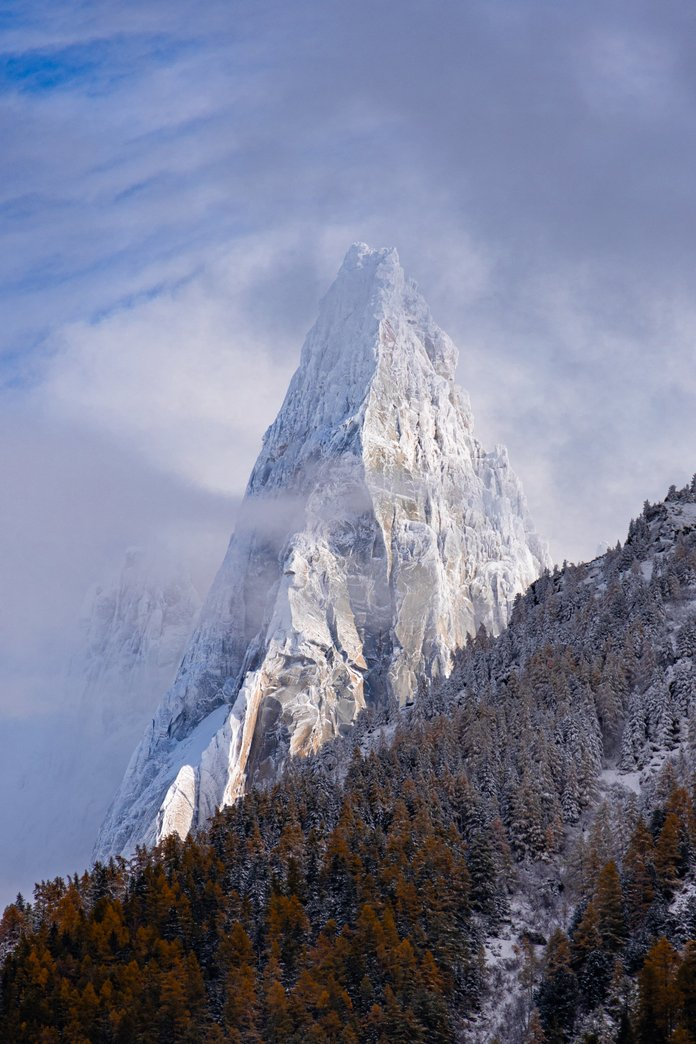

In [ ]:
# On charge une image prise pednant ces vacances
from PIL import Image
from IPython.display import display

im = Image.open("drus.jpg")
im = im.convert("RGB")  # important pour bien avoir 3 couleurs
px = im.load()
W, H = im.size

im2 = Image.new('RGB', (im.width, im.height)) 
px2 = im2.load()

im3 = Image.new('RGB', (im.width, im.height))
px3 = im3.load()

display(im)

In [41]:
def palette(px,W,H):
    couleurs = {}
    for x in range (W):
        for y in range (H):
            if px[x,y] not in couleurs:
                couleurs[px[x,y]] = 1
            else:
                couleurs[px[x,y]] += 1
    return couleurs

2. Proposez une méthode (naïve pour commencer) de choix d'une palette de $k$ couleurs. Affichez là sous forme d'image (exemple de d'image au milieu de la figure du dessus) avec une nouvelle image PIL. Utilisez également des images simples où le résultat attendu est connu comme pour les images ci-dessous :


In [42]:
def choix_palette(n,px,W,H):
    D = palette(px,W,H)
    C = [(k,v) for k,v in D.items()]
    C = C[:n]
    C.sort(key = lambda x: x[1])
    for k,v in D.items():
        if v > C[0][1]:
            C[0] = (k,v)
            C.sort(key = lambda x: x[1])
    return C

In [43]:
k = 10
C = choix_palette(k,px,W,H)

from IPython.display import display, HTML

def draw_rectangle(rgb_color):
    color = f'rgb({rgb_color[0]}, {rgb_color[1]}, {rgb_color[2]})'
    html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{color}" /></svg>'
    return html

html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{f'rgb({C[0][0][0]}, {C[0][0][1]}, {C[0][0][2]})'}" /></svg>'
for i in range (1,k):
    html += draw_rectangle(C[i][0])
display(HTML(html))


3. Re-coloriez une image avec une palette de $k$ couleurs, et affichez le résultat sous forme d'image PIL. Pour re-colorier chaque pixel, prendre la couleur la plus proche dans la palette en utilisant une fonction de distance (Euclidienne par exemple..).

In [44]:
from math import sqrt
def distance(c1: tuple, c2: tuple) -> float:
    r1,g1,b1 = c1
    r2,g2,b2 = c2
    return sqrt((r2-r1)**2 + (g2-g1)**2 + (b2-b1)**2)

In [45]:
def recoloriage(px,px2,W,H,k):
    C = choix_palette(k,px,W,H)
    for x in range(W):
        for y in range (H):
            choix = C[0][0]
            for c in C:
                if distance(px[x,y],choix) > distance(px[x,y],c[0]):
                    choix = c[0]
            px2[x,y] = choix

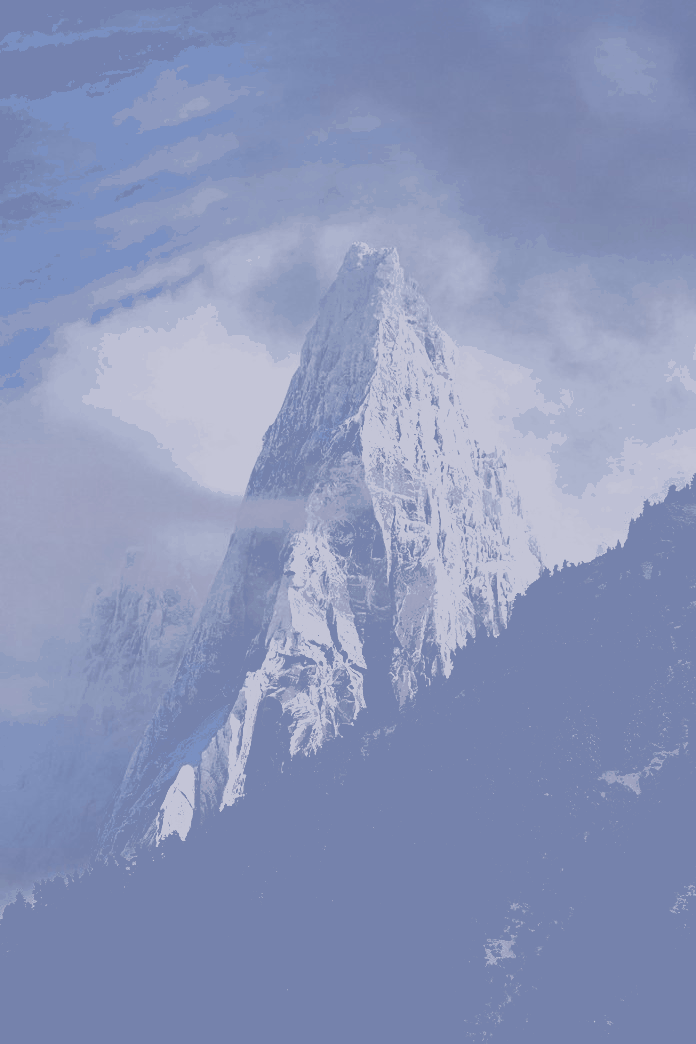

In [32]:
recoloriage(px,px2,W,H,100)
display(im2)

4. Proposez une méthode de validation de votre approche. Par exemple affichez la différence entre l'image originale et celle re-coloriée. Calculez un score global d'erreur.


In [33]:
def score(px,px2,W,H):
    S = 0
    N = W*H
    for x in range (W):
        for y in range (H):
            S += distance(px[x,y],px2[x,y])
    return (255 - S/N)/255


# faire une image avec des nuances de rouge selon l'erreur...

In [34]:
score(px,px2,W,H)

0.7876991375969139

In [ ]:
def score_image(px,px2,W,H)

5. Améliorez le choix des $k$ couleurs afin de minimiser l'erreur entre l'image originale et re-coloriée. Une piste possible est de trier les couleurs dans une liste, diviser cette liste en $k$ intervals de couleurs et prendre la couleur du milieu de chaque interval. D'autres méthodes plus avancées peuvent être explorées !


In [35]:
def choix_palette2(n,px,W,H,m):
    D = palette(px,W,H)
    C = [(k,v) for k,v in D.items()]
    C = C[:m*n]
    C.sort(key = lambda x: x[1])
    for k,v in D.items():
        if v > C[0][1]:
            C[0] = (k,v)
            C.sort(key = lambda x: x[1])
    L = []
    for k in range (n):
        L.append(C[m*k + 1])
    return L

In [36]:
k = 10
C = choix_palette2(k,px,W,H,1000)

from IPython.display import display, HTML

def draw_rectangle(rgb_color):
    color = f'rgb({rgb_color[0]}, {rgb_color[1]}, {rgb_color[2]})'
    html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{color}" /></svg>'
    return html

html = f'<svg width="100" height="100"><rect width="100" height="100" fill="{f'rgb({C[0][0][0]}, {C[0][0][1]}, {C[0][0][2]})'}" /></svg>'
for i in range (1,k):
    html += draw_rectangle(C[i][0])
display(HTML(html))


In [37]:
def recoloriage2(px,px2,W,H,k,palette):
    for x in range(W):
        for y in range (H):
            choix = palette[0][0]
            for c in palette:
                if distance(px[x,y],choix) > distance(px[x,y],c[0]):
                    choix = c[0]
            px2[x,y] = choix

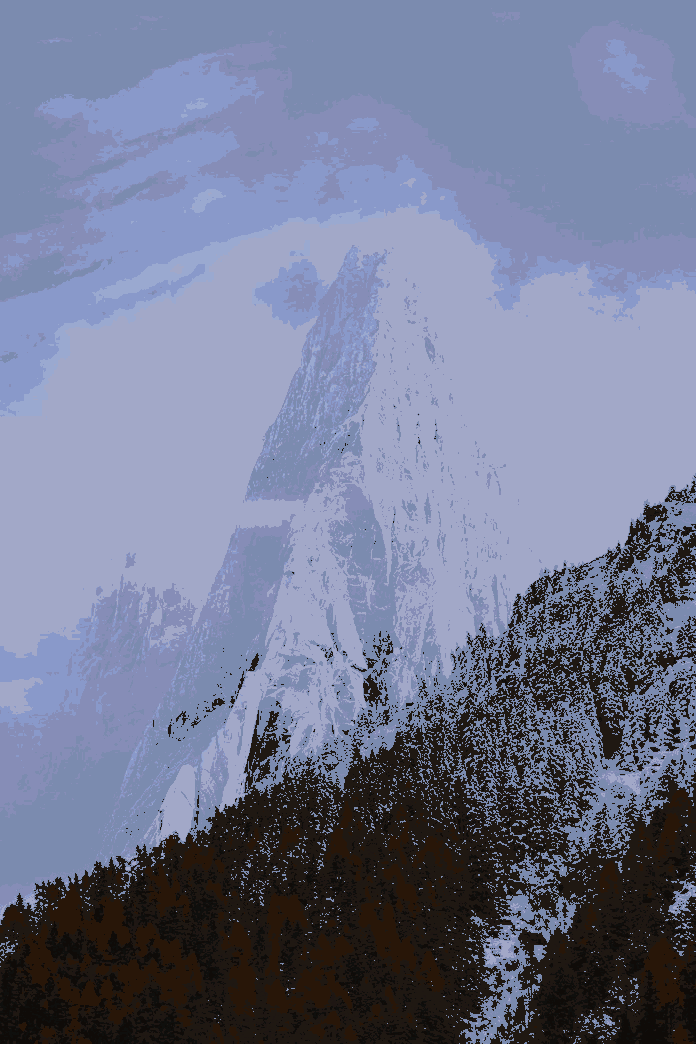

In [38]:
recoloriage2(px,px2,W,H,100,C)
display(im2)

In [39]:
score(px,px2,W,H)

0.8832505161999278

6. Testez votre palette sur plusieurs images de votre choix ou générées automatiquement avec un nombre et une distribution connue de couleurs. Comparer les performances de vos techniques avec d'autres méthodes (cette fois vous pouvez utiliser un éditeur de texte ou la fonction _quantize_ de PIL [(doc)](https://pillow.readthedocs.io/en/stable/reference/Image.html).


ne pas utiliser de belles images mais des images pertinentes
espace memoire necessaire...
temps necessaire....
comparaisn d'lgorithmes avec big O ???
utiliser algo dans TD 1 kaxzekknc

tester temps: image de plus en plus grande mais same et on recupere le temps et l'espace memoire

faire un tableau de synthese avec bilan de complexité en memoire, temporel etc.

utiliser matplotlib pour tracer et subplot etc.




7. Utilisez un pré-traitement des images (flou gaussien, etc) afin de lisser les couleurs. Cela est une piste afin de choisir de meilleurs couleurs représentatives. Proposez une comparaison de cette amélioration (ou de déterioration éventuelle) avec les autres méthodes.